# Trainning the stage 1 model

In [1]:
%cd /beegfs/xg703/Vision2018-Pose/src/
import numpy as np
import tensorflow as tf
from vgg import truncated_vgg19, prestage, normalize_per_channel
from model import stage1

/beegfs/xg703/Vision2018-Pose/src


## Model summary

In [2]:
# truncated_vgg19.summary()

In [3]:
# stage1.summary()

## Input statistics

In [4]:
def describe(X):
    print(f"min = {np.min(X)}")
    print(f"max = {np.max(X)}")
    print(f"mean = {np.mean(X)}")
    print(f"std = {np.std(X)}")

In [5]:
X = np.load("../dataset/processed/X_train.npy")
Y = np.load("../dataset/processed/Y_train.npy")
Z = np.load("../dataset/processed/Z_train.npy")
factors = np.load("../dataset/processed/factors_train.npy")

In [6]:
describe(X)

min = 0.0
max = 255.00000000000009
mean = 113.23408068573876
std = 70.64463875705135


In [7]:
describe(Y)

min = 0.0
max = 1.0
mean = 0.005252236818789604
std = 0.05139912135671097


## Running the prestage

In [8]:
# Z = prestage(X.copy()) # The intermediate result
#                        # prestage mutates its argument. For plotting purposes I'll use
#                        # a copy here to maintain the original X
# factors = normalize_per_channel(Z)
# np.save("../dataset/processed/Z_train.npy", Z)
# np.save("../dataset/processed/factors_train.npy", factors)

In [9]:
describe(Z)

min = -0.8751343488693237
max = 84.16950988769531
mean = 1.745208777492735e-08
std = 1.0000040531158447


## Train the model

In [10]:
history = stage1.fit(Z, Y, epochs=10, validation_split=0.2)

Train on 4000 samples, validate on 1000 samples
Epoch 1/10
4000/4000 [==============================] - 11s 3ms/step - loss: 0.0862 - mean_absolute_error: 0.0120 - val_loss: 0.0725 - val_mean_absolute_error: 0.0085
Epoch 2/10
4000/4000 [==============================] - 9s 2ms/step - loss: 0.0715 - mean_absolute_error: 0.0088 - val_loss: 0.0680 - val_mean_absolute_error: 0.0084
Epoch 3/10
4000/4000 [==============================] - 10s 2ms/step - loss: 0.0669 - mean_absolute_error: 0.0082 - val_loss: 0.0658 - val_mean_absolute_error: 0.0084
Epoch 4/10
4000/4000 [==============================] - 10s 3ms/step - loss: 0.0635 - mean_absolute_error: 0.0078 - val_loss: 0.0644 - val_mean_absolute_error: 0.0072
Epoch 5/10
4000/4000 [==============================] - 9s 2ms/step - loss: 0.0606 - mean_absolute_error: 0.0076 - val_loss: 0.0635 - val_mean_absolute_error: 0.0081
Epoch 6/10
4000/4000 [==============================] - 10s 2ms/step - loss: 0.0577 - mean_absolute_error: 0.0073 - val

In [19]:
# TODO: visualize history
# stage1.save("../dataset/models/stage1.h5")
stage1.save_weights("../dataset/models/stage1_weights.h5")

# Prediction results on the training set

In [12]:
from config import KEYPOINTS
from plot import plot_on_img
import matplotlib.pyplot as plt

In [13]:
expls = np.arange(5) # choose first 5 images
X_val = X[expls,...]
Y_val = Y[expls,...]

In [14]:
Z_val = prestage(X_val.copy()) # again copy to make plotting easier
normalize_per_channel(Z_val, factors)
describe(Z_val)

min = -0.8751343488693237
max = 15.301407814025879
mean = -0.01195216178894043
std = 0.9753322005271912


In [15]:
Y_predict = stage1.predict(Z_val)
describe(Y_predict)

min = -0.03218208998441696
max = 0.7656658291816711
mean = 0.0028362267185002565
std = 0.02361099235713482


In [16]:
expl = 0
x = X_val[expl,...] / 255.0 # scale to matplotlib's [0,1] range
y = Y_val[expl,...]
y_predict = Y_predict[expl,...]
kp = KEYPOINTS.index("left_eye")

Text(0.5,1,'Ground truth')

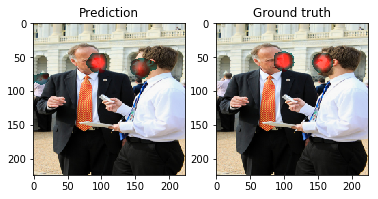

In [17]:
plt.figure()
plt.subplot(1,2,1)
plot_on_img(x, y_predict, kp)
plt.title("Prediction")
plt.subplot(1,2,2)
plot_on_img(x, y, kp)
plt.title("Ground truth")